# Início

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base = pd.read_csv('Anac_data.csv')
display(base)

def formatar(valor):
    return "{:,.2f}".format(valor)
    
def formatarPorcentagem(valor):
    return "{:,.2f}%".format(valor)

,EMPRESA_SIGLA,EMPRESA_NOME,ANO,MES,AEROPORTO_DE_ORIGEM_SIGLA,AEROPORTO_DE_ORIGEM_NOME,AEROPORTO_DE_ORIGEM_UF,AEROPORTO_DE_ORIGEM_REGIAO,AEROPORTO_DE_DESTINO_SIGLA,AEROPORTO_DE_DESTINO_NOME,...,GRUPO_DE_VOO,PASSAGEIROS_PAGOS,PASSAGEIROS_GRATIS,ASK,RPK,COMBUSTIVEL_LITROS,DISTANCIA_VOADA_KM,DECOLAGENS,ASSENTOS,HORAS_VOADAS
0,ABJ,ATA - AEROTÁXI ABAETÉ LTDA.,2022,1,SBSV,SALVADOR,BA,NORDESTE,SIRI,MARAÚ,...,REGULAR,38,0,16254,4902,1624,1806,14,126,9.33800
1,ABJ,ATA - AEROTÁXI ABAETÉ LTDA.,2022,1,SBSV,SALVADOR,BA,NORDESTE,SNCL,CAIRU,...,REGULAR,337,0,56772,27971,5624,6308,76,684,38.45000
2,ABJ,ATA - AEROTÁXI ABAETÉ LTDA.,2022,1,SIRI,MARAÚ,BA,NORDESTE,SBSV,SALVADOR,...,REGULAR,84,0,16254,10836,1624,1806,14,126,9.33800
3,ABJ,ATA - AEROTÁXI ABAETÉ LTDA.,2022,1,SNCL,CAIRU,BA,NORDESTE,SBSV,SALVADOR,...,REGULAR,561,0,56025,46563,5550,6225,75,675,36.50000
4,ABJ,ATA - AEROTÁXI ABAETÉ LTDA.,2022,2,SBSV,SALVADOR,BA,NORDESTE,SIRI,MARAÚ,...,REGULAR,35,0,9288,4515,928,1032,8,72,5.33600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54693,TTL,TOTAL LINHAS AÉREAS S.A.,2024,3,SBPA,PORTO ALEGRE,RS,SUL,SBGR,GUARULHOS,...,REGULAR,0,0,0,0,172812,17320,20,0,34.96670
54694,TTL,TOTAL LINHAS AÉREAS S.A.,2024,3,SBPV,PORTO VELHO,RO,NORTE,SBGR,GUARULHOS,...,NÃO REGULAR,0,0,0,0,10398,2474,1,0,4.05000
54695,TTL,TOTAL LINHAS AÉREAS S.A.,2024,3,SBSV,SALVADOR,BA,NORDESTE,SBVT,VITÓRIA,...,NÃO REGULAR,0,0,0,0,4260,844,1,0,1.48333
54696,TTL,TOTAL LINHAS AÉREAS S.A.,2024,3,SBVT,VITÓRIA,ES,SUDESTE,SBGL,RIO DE JANEIRO,...,NÃO REGULAR,0,0,0,0,2881,418,1,0,1.10000


# Substuindo valores com vírgula por pontos e transformando em float

In [12]:
# base['HORAS_VOADAS'] = base['HORAS_VOADAS'].str.replace(',','.')
# base['HORAS_VOADAS'] = base['HORAS_VOADAS'].astype(float)
# base['MES'] = base['MES'].astype(int)
# base.to_csv("Anac_data.csv")

# Removendo linhas com TOT, MWM, LTG sem valores de ASK e RPK e ASO	pois tem poucos valores

In [13]:
# base.drop(base[base['EMPRESA_SIGLA'] == 'TOT'].index, inplace = True)#
# base.drop(base[base['EMPRESA_SIGLA'] == 'LTG'].index, inplace = True)
# base.drop(base[base['EMPRESA_SIGLA'] == 'MWM'].index, inplace = True)
#base.drop(base[base['EMPRESA_SIGLA'] == 'ASO'].index, inplace = True)
#base[base['EMPRESA_SIGLA'] == 'ASO']
#base.to_csv("Anac_data.csv", index=False)

# Removendo colunas PAYLOAD, ATK, RTK, BAGAGEM_KG

In [14]:
# base = base.drop('ATK', axis=1)
# base = base.drop('RTK', axis=1)
# base = base.drop('PAYLOAD', axis=1)
# base = base.drop('BAGAGEM_KG', axis=1)
# base.to_csv("Anac_data.csv", index=False)
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54698 entries, 0 to 54697
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   EMPRESA_SIGLA                54698 non-null  object 
 1   EMPRESA_NOME                 54698 non-null  object 
 2   ANO                          54698 non-null  int64  
 3   MES                          54698 non-null  int64  
 4   AEROPORTO_DE_ORIGEM_SIGLA    54698 non-null  object 
 5   AEROPORTO_DE_ORIGEM_NOME     54698 non-null  object 
 6   AEROPORTO_DE_ORIGEM_UF       54698 non-null  object 
 7   AEROPORTO_DE_ORIGEM_REGIAO   54698 non-null  object 
 8   AEROPORTO_DE_DESTINO_SIGLA   54698 non-null  object 
 9   AEROPORTO_DE_DESTINO_NOME    54698 non-null  object 
 10  AEROPORTO_DE_DESTINO_UF      54698 non-null  object 
 11  AEROPORTO_DE_DESTINO_REGIAO  54698 non-null  object 
 12  GRUPO_DE_VOO                 54698 non-null  object 
 13  PASSAGEIROS_PAGO

# Checando se ainda há valores nulos

In [15]:
base.isnull().sum()

EMPRESA_SIGLA                  0
EMPRESA_NOME                   0
ANO                            0
MES                            0
AEROPORTO_DE_ORIGEM_SIGLA      0
AEROPORTO_DE_ORIGEM_NOME       0
AEROPORTO_DE_ORIGEM_UF         0
AEROPORTO_DE_ORIGEM_REGIAO     0
AEROPORTO_DE_DESTINO_SIGLA     0
AEROPORTO_DE_DESTINO_NOME      0
AEROPORTO_DE_DESTINO_UF        0
AEROPORTO_DE_DESTINO_REGIAO    0
GRUPO_DE_VOO                   0
PASSAGEIROS_PAGOS              0
PASSAGEIROS_GRATIS             0
ASK                            0
RPK                            0
COMBUSTIVEL_LITROS             0
DISTANCIA_VOADA_KM             0
DECOLAGENS                     0
ASSENTOS                       0
HORAS_VOADAS                   0
dtype: int64

# Analisando RPK (Revenue Passenger‐Kilometers) de cada empresa. AZU, GLO e TAM tem os melhores valores de RPK.
# Obs.: RPK trata da receita por passageiro por quilômetro. Esse é um indicador que mede a quantidade total de receita gerada por uma companhia aérea a partir do transporte de passageiros por quilômetro voado.

In [21]:
rpk_empresa = base[['EMPRESA_SIGLA', 'RPK']].groupby('EMPRESA_SIGLA').sum()
rpk_empresa["RPK"] = rpk_empresa["RPK"].apply(formatar)
display(rpk_empresa)

,RPK
EMPRESA_SIGLA,
ABJ,"1,076,163.00"
ACN,"44,610,779.00"
AZU,"60,389,506,961.00"
GLO,"69,758,887,219.00"
OMI,"3,878,388.00"
PAM,"158,923,498.00"
PTB,"674,938,236.00"
SID,"95,222,320.00"
TAM,"78,385,343,922.00"


# Analisando ASK (Available Seat‐Kilometers) de cada empresa. AZU, GLO e TAM tem os melhores valores de ASK.
# ASK é outro indicador crucial que mede a capacidade de uma companhia aérea de oferecer assentos disponíveis por quilômetro voado. Em outras palavras, o ASK representa a oferta de assentos disponíveis para os passageiros. 

In [22]:
ask_empresa = base[['EMPRESA_SIGLA', 'ASK']].groupby('EMPRESA_SIGLA').sum()
ask_empresa.ASK = ask_empresa.ASK.apply(formatar)
display(ask_empresa)

,ASK
EMPRESA_SIGLA,
ABJ,"1,817,425.00"
ACN,"101,612,136.00"
AZU,"76,541,811,485.00"
GLO,"85,796,545,998.00"
OMI,"12,609,696.00"
PAM,"248,083,005.00"
PTB,"1,069,369,630.00"
SID,"219,444,965.00"
TAM,"97,180,976,752.00"


# Por que AZU, GLO e TAM tem os melhores valores? Tem alguma região em que focam mais? R: Sudeste

In [8]:
melhores_empresas = base.loc[(base['EMPRESA_SIGLA'] == 'AZU') | (base['EMPRESA_SIGLA'] == 'GLO') | (base['EMPRESA_SIGLA'] == 'TAM')]
decolagens_regiao = melhores_empresas[['EMPRESA_SIGLA', 'AEROPORTO_DE_DESTINO_REGIAO', 'DECOLAGENS']].groupby(['EMPRESA_SIGLA', 'AEROPORTO_DE_DESTINO_REGIAO']).sum()
decolagens_regiao.DECOLAGENS = decolagens_regiao.DECOLAGENS.apply(formatar)
display(decolagens_regiao)

DECOLAGENS
EMPRESA_SIGLA AEROPORTO_DE_DESTINO_REGIAO            
AZU           CENTRO-OESTE                  53,654.00
              NORDESTE                     133,372.00
              NORTE                         47,676.00
              SUDESTE                      314,631.00
              SUL                           89,852.00
GLO           CENTRO-OESTE                  59,245.00
              NORDESTE                      89,644.00
              NORTE                         19,684.00
              SUDESTE                      236,522.00
              SUL                           59,197.00
TAM           CENTRO-OESTE                  73,235.00
              NORDESTE                      81,031.00
              NORTE                         20,440.00
              SUDESTE                      269,736.00
              SUL                           65,038.00

# Decolagens por mês em cada região (AZU, GLO e TAM)

<Axes: xlabel='MES', ylabel='DECOLAGENS'>

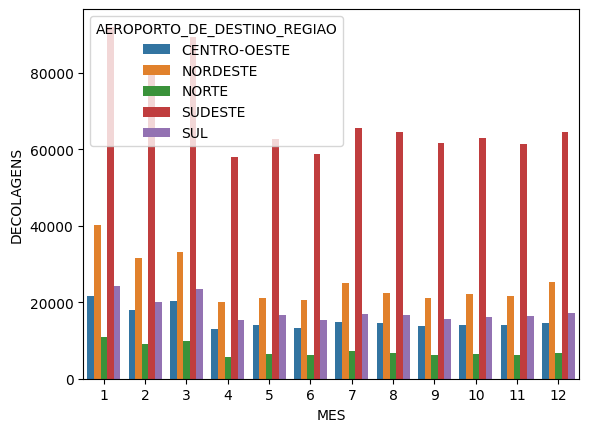

In [27]:
decolagens_mes = melhores_empresa[['MES', 'AEROPORTO_DE_DESTINO_REGIAO', 'DECOLAGENS']].groupby(['MES', 'AEROPORTO_DE_DESTINO_REGIAO']).sum()
sns.barplot(data=decolagens_mes, x='MES', y='DECOLAGENS', hue="AEROPORTO_DE_DESTINO_REGIAO")


# Decolagens por mês gráfico (AZU, GLO e TAM)

<Axes: xlabel='MES', ylabel='DECOLAGENS'>

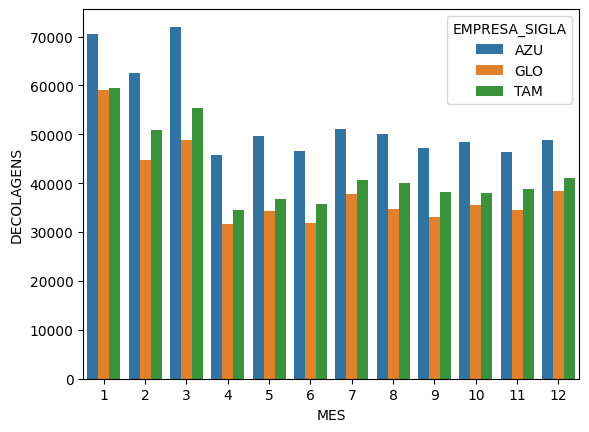

In [24]:
decolagens_mes_melhores_empresas = melhores_empresas[['EMPRESA_SIGLA', 'MES','DECOLAGENS']].groupby(['EMPRESA_SIGLA', 'MES']).sum()
sns.barplot(data=decolagens_mes_melhores_empresas, x='MES', y='DECOLAGENS', hue="EMPRESA_SIGLA")

# Relação de passeiros pagos e grátis e grupo de voo de cada empresa

In [29]:
passeiro_empresa = base[['EMPRESA_SIGLA', 'GRUPO_DE_VOO','PASSAGEIROS_PAGOS', 'PASSAGEIROS_GRATIS']].groupby(['EMPRESA_SIGLA', 'GRUPO_DE_VOO']).sum()
passeiro_empresa.PASSAGEIROS_PAGOS = passeiro_empresa.PASSAGEIROS_PAGOS.apply(formatar)
passeiro_empresa.PASSAGEIROS_GRATIS = passeiro_empresa.PASSAGEIROS_GRATIS.apply(formatar)
display(passeiro_empresa)

PASSAGEIROS_PAGOS PASSAGEIROS_GRATIS
EMPRESA_SIGLA GRUPO_DE_VOO                                     
ABJ           NÃO REGULAR               8.00               0.00
              REGULAR              12,467.00             224.00
ACN           IMPRODUTIVO               0.00               0.00
              NÃO REGULAR           2,761.00               8.00
              REGULAR             134,749.00           1,295.00
AZU           IMPRODUTIVO          58,103.00           1,631.00
              NÃO REGULAR       1,964,608.00          45,193.00
              REGULAR          59,024,104.00       1,598,773.00
GLO           IMPRODUTIVO          14,326.00             358.00
              NÃO REGULAR       1,948,869.00          21,673.00
              REGULAR          60,466,723.00       1,518,663.00
OMI           IMPRODUTIVO               0.00               0.00
              NÃO REGULAR           4,817.00             470.00
PAM           IMPRODUTIVO              73.00               2.00
              NÃO REGULAR         148,030.00             160.00
              REGULAR             142,647.00           3,133.00
PTB           IMPRODUTIVO             212.00               3.00
              NÃO REGULAR           3,906.00             131.00
              REGULAR           1,427,397.00          23,175.00
SID           IMPRODUTIVO               0.00              44.00
              NÃO REGULAR          31,986.00             190.00
              REGULAR                   0.00               0.00
TAM           IMPRODUTIVO               0.00               3.00
              NÃO REGULAR         900,126.00          13,239.00
              REGULAR          69,444,947.00       1,009,585.00
TTL           IMPRODUTIVO              22.00               2.00
              NÃO REGULAR           2,308.00             124.00
              REGULAR                   0.00               0.00

# Consumo de combustível por litro de cada empresa nos últimos 2 anos

In [30]:
consumo_combustivel = base[['EMPRESA_SIGLA', 'COMBUSTIVEL_LITROS']].groupby(['EMPRESA_SIGLA']).sum()
consumo_combustivel.COMBUSTIVEL_LITROS = consumo_combustivel.COMBUSTIVEL_LITROS.apply(formatar)
display(consumo_combustivel)

,COMBUSTIVEL_LITROS
EMPRESA_SIGLA,
ABJ,"182,339.00"
ACN,"9,364,595.00"
AZU,"2,171,768,252.00"
GLO,"2,235,543,854.00"
OMI,"648,131.00"
PAM,"10,130,542.00"
PTB,"42,723,107.00"
SID,"100,294,294.00"
TAM,"2,832,937,408.00"


# Consumo médio de combustível por horas voadas origem/destino

In [38]:
consumo_combustivel_origem_destino = base[['AEROPORTO_DE_ORIGEM_NOME', 'AEROPORTO_DE_DESTINO_NOME', 'COMBUSTIVEL_LITROS', 'HORAS_VOADAS']].groupby(['AEROPORTO_DE_ORIGEM_NOME', 'AEROPORTO_DE_DESTINO_NOME']).mean()
consumo_combustivel_origem_destino.COMBUSTIVEL_LITROS = consumo_combustivel_origem_destino.COMBUSTIVEL_LITROS.apply(formatar)
consumo_combustivel_origem_destino.HORAS_VOADAS = consumo_combustivel_origem_destino.HORAS_VOADAS.apply(formatar)
consumo_combustivel_origem_destino.head()

COMBUSTIVEL_LITROS  \
AEROPORTO_DE_ORIGEM_NOME AEROPORTO_DE_DESTINO_NOME                      
ALEGRETE                 PORTO ALEGRE                        2,168.07   
ALMEIRIM                 ALMEIRIM                              434.15   
                         BELÉM                               2,731.47   
                         BREVES                                181.00   
                         MACAPÁ                                973.50   

                                                   HORAS_VOADAS  
AEROPORTO_DE_ORIGEM_NOME AEROPORTO_DE_DESTINO_NOME               
ALEGRETE                 PORTO ALEGRE                     14.64  
ALMEIRIM                 ALMEIRIM                          3.65  
                         BELÉM                            18.27  
                         BREVES                            1.33  
                         MACAPÁ                            6.80

# Dividir RPK/ASK = AIR PASSENGER LOAD FACTOR (Mais próximo de 100%, mais passageiros pagos)

In [50]:
valores_rpk_ask = base[['EMPRESA_SIGLA', 'RPK', 'ASK']].groupby(['EMPRESA_SIGLA']).sum()
air_passenger_load_factor = (valores_rpk_ask.RPK/valores_rpk_ask.ASK)*100
air_passenger_load_factor = air_passenger_load_factor.to_frame()
air_passenger_load_factor.columns = ['AIR_PASSENGER_LOAD_FACTOR']
air_passenger_load_factor['AIR_PASSENGER_LOAD_FACTOR'] = air_passenger_load_factor['AIR_PASSENGER_LOAD_FACTOR'].apply(formatarPorcentagem)
display(air_passenger_load_factor)

,AIR_PASSENGER_LOAD_FACTOR
EMPRESA_SIGLA,
ABJ,59.21%
ACN,43.90%
AZU,78.90%
GLO,81.31%
OMI,30.76%
PAM,64.06%
PTB,63.12%
SID,43.39%
TAM,80.66%


# Quantidade de registro por empresa

In [56]:
qta_registro = base['EMPRESA_SIGLA'].value_counts().to_frame()
qta_registro.columns = ['REGISTROS']
display(qta_registro)

,REGISTROS
EMPRESA_SIGLA,
AZU,20233
GLO,12729
TAM,11101
ACN,5332
PTB,2012
SID,1485
PAM,993
TTL,576
ABJ,126
